In [1]:
# We will analize here What Areas Should the Department of Housing Preservation and Development of New York City Focus On?

# The goal of this project is to do explore the data to find the answer to the Question  - 
# Should the Department of Housing Preservation and Development of New York City focus on any particular set of boroughs, 
# ZIP codes or street (where the complaints are severe) for the specific type of complaints that we identified?


import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0


# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
client_b1090d99cfbd4b519f3f3860b6221f72 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='<**REPLACE_WITH_YOUR_IBM_API_KEY_ID**>',
    ibm_auth_endpoint="https://iam.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_b1090d99cfbd4b519f3f3860b6221f72.get_object(Bucket='<**REPLACE_WITH_YOUR_BUCKET_ID**>',Key='fhrw-4uyv.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# upload dataset

df_data_2 = pd.read_csv(body)
df_data_2.head()

,created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,address_type,city,resolution_description,borough,latitude,longitude,closed_date,location_type,status
0,2019-06-13T18:47:05.000,43096054,DOOR/WINDOW,11225.0,501 NEW YORK AVENUE,NEW YORK AVENUE,ADDRESS,BROOKLYN,The Department of Housing Preservation and Dev...,BROOKLYN,40.662897,-73.947941,2019-06-25T11:15:05.000,RESIDENTIAL BUILDING,Closed
1,2019-06-25T09:50:51.000,43095936,PAINT/PLASTER,10034.0,639 WEST 207 STREET,WEST 207 STREET,ADDRESS,NEW YORK,The following complaint conditions are still o...,MANHATTAN,40.868598,-73.921780,NaN,RESIDENTIAL BUILDING,Open
2,2019-05-23T16:59:36.000,43096069,PAINT/PLASTER,10009.0,542 EAST 11 STREET,EAST 11 STREET,ADDRESS,NEW YORK,The Department of Housing Preservation and Dev...,MANHATTAN,40.728000,-73.980751,2019-06-25T11:25:15.000,RESIDENTIAL BUILDING,Closed
3,2019-06-11T12:18:03.000,43096048,SAFETY,10040.0,40 ARDEN STREET,ARDEN STREET,ADDRESS,NEW YORK,The Department of Housing Preservation and Dev...,MANHATTAN,40.862066,-73.927229,2019-06-25T12:58:43.000,RESIDENTIAL BUILDING,Closed
4,2019-06-25T22:12:53.000,43096125,GENERAL,11211.0,566 LORIMER STREET,LORIMER STREET,ADDRESS,BROOKLYN,The following complaint conditions are still o...,BROOKLYN,40.713860,-73.949326,NaN,RESIDENTIAL BUILDING,Open


In [3]:
#Save dataset to pkl file

df_data_2.to_pickle('./df_raw2.pkl')

In [4]:
client_cred.upload_file('./df_raw2.pkl',bucket,'df_raw_cos.pkl')

In [5]:
client_cred.download_file(Bucket=bucket,Key='df_raw_cos.pkl',Filename='./df_raw_local.pkl')

In [6]:
df1 = pd.read_pickle('./df_raw_local.pkl')

In [7]:
# shape of DF with total number of complaints -5 812 405 and 15 Columns.

df1.shape

(5812405, 15)

In [8]:
# let's examine our dataset with first 5 complaints
df1.head()

,created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,address_type,city,resolution_description,borough,latitude,longitude,closed_date,location_type,status
0,2019-06-13T18:47:05.000,43096054,DOOR/WINDOW,11225.0,501 NEW YORK AVENUE,NEW YORK AVENUE,ADDRESS,BROOKLYN,The Department of Housing Preservation and Dev...,BROOKLYN,40.662897,-73.947941,2019-06-25T11:15:05.000,RESIDENTIAL BUILDING,Closed
1,2019-06-25T09:50:51.000,43095936,PAINT/PLASTER,10034.0,639 WEST 207 STREET,WEST 207 STREET,ADDRESS,NEW YORK,The following complaint conditions are still o...,MANHATTAN,40.868598,-73.921780,NaN,RESIDENTIAL BUILDING,Open
2,2019-05-23T16:59:36.000,43096069,PAINT/PLASTER,10009.0,542 EAST 11 STREET,EAST 11 STREET,ADDRESS,NEW YORK,The Department of Housing Preservation and Dev...,MANHATTAN,40.728000,-73.980751,2019-06-25T11:25:15.000,RESIDENTIAL BUILDING,Closed
3,2019-06-11T12:18:03.000,43096048,SAFETY,10040.0,40 ARDEN STREET,ARDEN STREET,ADDRESS,NEW YORK,The Department of Housing Preservation and Dev...,MANHATTAN,40.862066,-73.927229,2019-06-25T12:58:43.000,RESIDENTIAL BUILDING,Closed
4,2019-06-25T22:12:53.000,43096125,GENERAL,11211.0,566 LORIMER STREET,LORIMER STREET,ADDRESS,BROOKLYN,The following complaint conditions are still o...,BROOKLYN,40.713860,-73.949326,NaN,RESIDENTIAL BUILDING,Open


In [9]:
# our top complaints type is HEAT/HOT WATER  

df1['complaint_type'].value_counts().head(1)

HEAT/HOT WATER    1146190
Name: complaint_type, dtype: int64

In [10]:
# we can define total quantity of complaint types. Here  22 complaint types

df1['complaint_type'].nunique()

22

In [11]:
# we can see description of complaint types

df1['complaint_type'].unique()

array(['DOOR/WINDOW', 'PAINT/PLASTER', 'SAFETY', 'GENERAL',
       'UNSANITARY CONDITION', 'WATER LEAK', 'HEAT/HOT WATER', 'ELECTRIC',
       'PLUMBING', 'FLOORING/STAIRS', 'ELEVATOR', 'APPLIANCE',
       'HPD Literature Request', 'OUTSIDE BUILDING', 'AGENCY', 'HEATING',
       'NONCONST', 'PAINT - PLASTER', 'GENERAL CONSTRUCTION',
       'CONSTRUCTION', 'STRUCTURAL', 'VACANT APARTMENT'], dtype=object)

In [12]:
# let's choose only 'HEAT/HOT WATER' complaints

df_water=df1[df1['complaint_type']=='HEAT/HOT WATER']

In [13]:
# as we saw before total quantity of this complaints type is  1 146 190 complaints:

df_water.shape

(1146190, 15)

In [14]:
# Our new data frame only with complaint type - HEAT/HOT WATER. Examine it.

df_water.head(5)

,created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,address_type,city,resolution_description,borough,latitude,longitude,closed_date,location_type,status
9,2019-06-25T16:46:33.000,43095907,HEAT/HOT WATER,11436.0,142-41 122 AVENUE,122 AVENUE,ADDRESS,Jamaica,The following complaint conditions are still o...,QUEENS,40.675196,-73.796513,NaN,RESIDENTIAL BUILDING,Open
36,2019-06-25T22:16:05.000,43097991,HEAT/HOT WATER,11355.0,143-30 SANFORD AVENUE,SANFORD AVENUE,ADDRESS,Flushing,The following complaint conditions are still o...,QUEENS,40.758432,-73.822248,NaN,RESIDENTIAL BUILDING,Open
42,2019-06-25T15:47:52.000,43098132,HEAT/HOT WATER,11237.0,289 HARMAN STREET,HARMAN STREET,ADDRESS,BROOKLYN,The following complaint conditions are still o...,BROOKLYN,40.699896,-73.918891,NaN,RESIDENTIAL BUILDING,Open
45,2019-06-25T07:55:56.000,43097996,HEAT/HOT WATER,11230.0,2010 OCEAN AVENUE,OCEAN AVENUE,ADDRESS,BROOKLYN,The complaint you filed is a duplicate of a co...,BROOKLYN,40.612692,-73.953941,NaN,RESIDENTIAL BUILDING,Open
48,2019-06-25T13:04:53.000,43097987,HEAT/HOT WATER,10460.0,883 EAST 180 STREET,EAST 180 STREET,ADDRESS,BRONX,The Department of Housing Preservation and Dev...,BRONX,40.845205,-73.882863,2019-06-25T16:41:30.000,RESIDENTIAL BUILDING,Closed


In [15]:
# Total number of Zip codes with complaints - 190

df_water['incident_zip'].nunique()

190

In [16]:
# Total number of Addresses with complaints - 92 838 

df_water['incident_address'].nunique()

92838

In [17]:
# Total number of Streets with complaints- 5 216
df_water['street_name'].nunique()

5216

In [18]:
# we can define streets with maximum numbers of complaints - this is GRAND CONCOURSE street with 20 310 complaints and BROADWAY with 14 293 complaints

df_water['street_name'].value_counts()

GRAND CONCOURSE             20310
BROADWAY                    14293
ELMHURST AVENUE              9913
OCEAN AVENUE                 9215
MORRIS AVENUE                9044
BOYNTON AVENUE               8394
ST NICHOLAS AVENUE           7865
AMSTERDAM AVENUE             6817
DR M L KING JR BOULEVARD     6317
OCEAN PARKWAY                5868
LINDEN BOULEVARD             5636
ARDEN STREET                 5624
DECATUR AVENUE               5243
SEDGWICK AVENUE              5166
WALTON AVENUE                5132
EAST TREMONT AVENUE          4906
CRESTON AVENUE               4827
NOSTRAND AVENUE              4694
BEDFORD AVENUE               4689
RIVERSIDE DRIVE              4531
SHORE ROAD                   4512
EASTERN PARKWAY              4423
2 AVENUE                     4356
FULTON STREET                4319
WASHINGTON AVENUE            4194
SHERIDAN AVENUE              4126
DAVIDSON AVENUE              4123
WALLACE AVENUE               3910
3 AVENUE                     3859
ADAM C POWELL 

In [19]:
#  TOP 5 zip codes with maximum number of complaints

df_water['incident_zip'].value_counts().head()

11226.0    37959
10458.0    35566
10467.0    34643
10468.0    31194
10453.0    31157
Name: incident_zip, dtype: int64

In [20]:
# Borough with maximum number of complaints - BRONX

df_water['borough'].value_counts()

BRONX            372670
BROOKLYN         350661
MANHATTAN        259567
QUEENS           151964
STATEN ISLAND     11327
Unspecified           1
Name: borough, dtype: int64

In [21]:
# Save Boroughs to new Data frame

df_w=df_water['borough'].value_counts()


In [22]:
# Chek new Data Frame
df_w

BRONX            372670
BROOKLYN         350661
MANHATTAN        259567
QUEENS           151964
STATEN ISLAND     11327
Unspecified           1
Name: borough, dtype: int64

In [23]:
# use the inline backend to generate the plots 
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') 

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.0.2


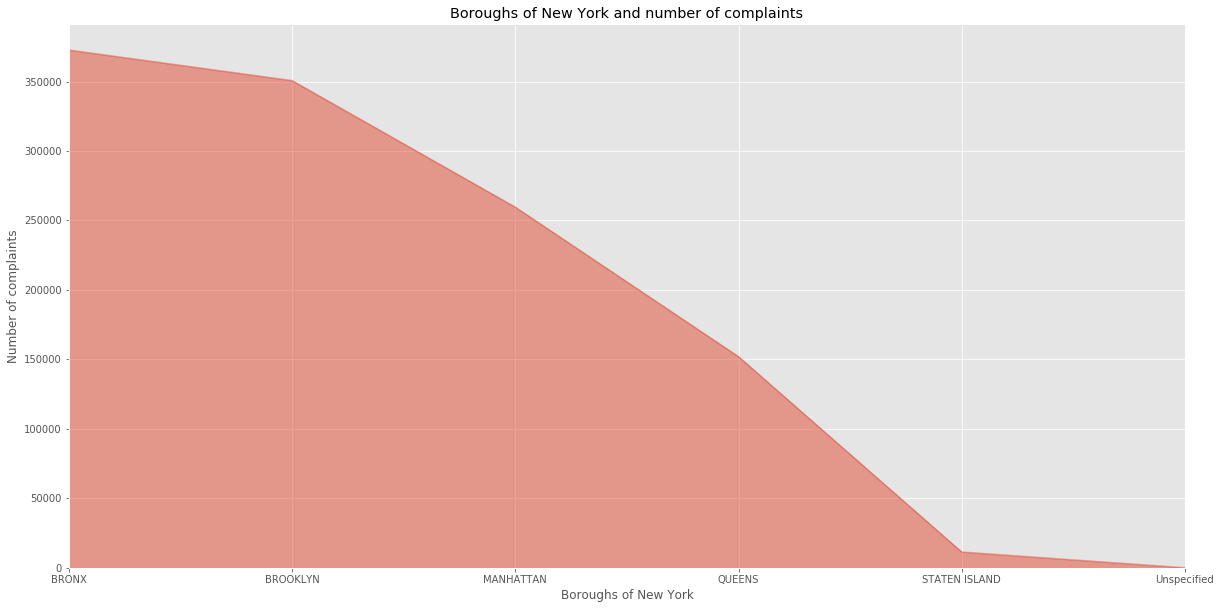

In [24]:
# Area plot with Boroughs of New York

df_w.plot(kind='area', 
stacked=False,
figsize=(20, 10),  )

plt.title('Boroughs of New York and number of complaints')
plt.ylabel('Number of complaints')
plt.xlabel('Boroughs of New York')

plt.show()


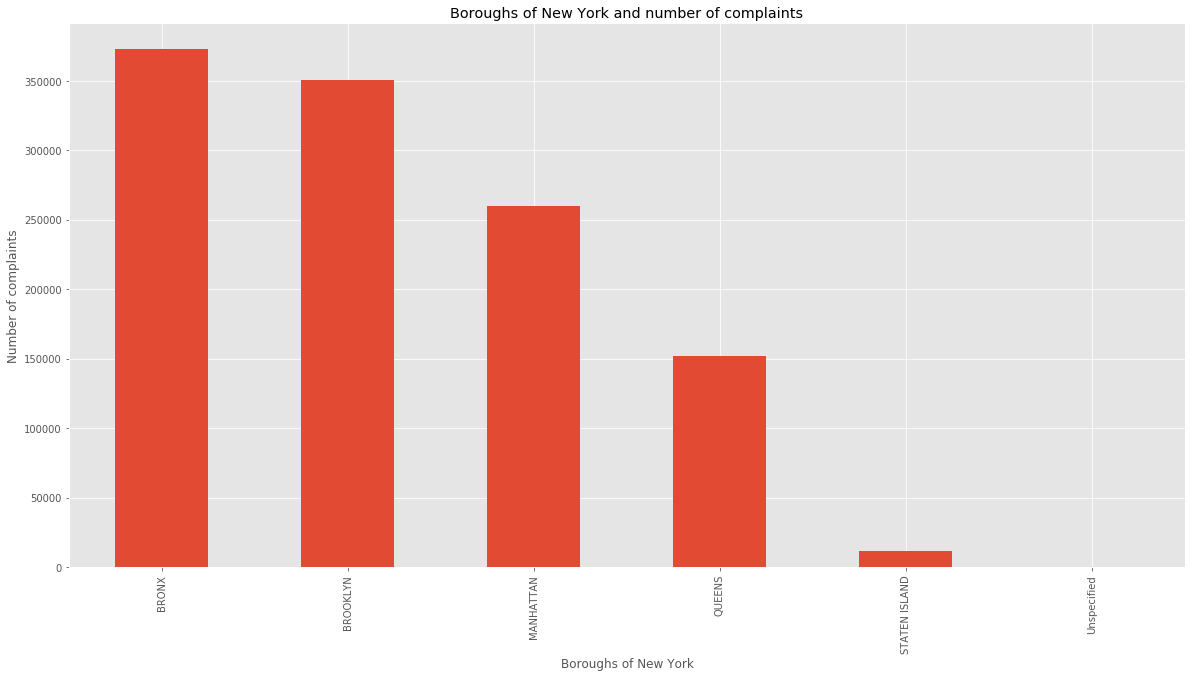

In [25]:
# Bar chart with Boroughs of New York

df_w.plot(kind='bar', 
stacked=False,
figsize=(20, 10),  )

plt.title('Boroughs of New York and number of complaints')
plt.ylabel('Number of complaints')
plt.xlabel('Boroughs of New York')

plt.show()

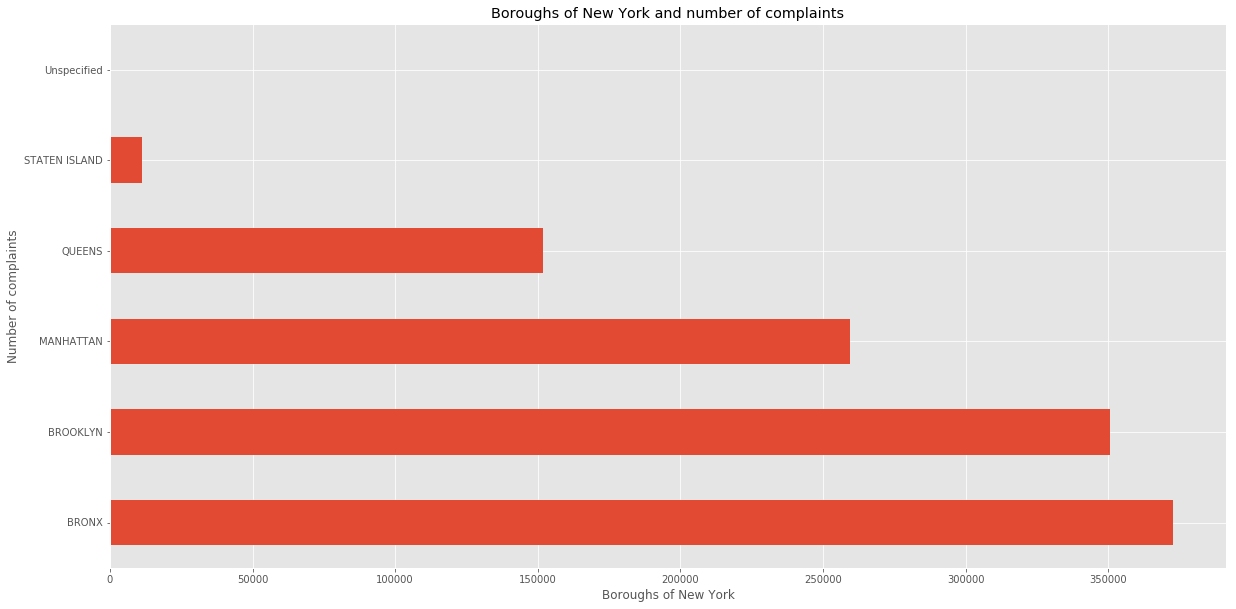

In [26]:
# Horizontal Bar plot with Boroughs of New York

df_w.plot(kind='barh', 
stacked=False,
figsize=(20, 10),  )

plt.title('Boroughs of New York and number of complaints')
plt.ylabel('Number of complaints')
plt.xlabel('Boroughs of New York')

plt.show()

In [27]:
# CONCLUSION:

# We defined Borough with maximum number of complaints- BRONX
# We defined streets with maximum number of complaints - GRAND CONCOURSE street with 20 310 complaints and BROADWAY with 14 293 complaints
# We defined top 5 zip codes with maximum number of complaints - 11226, 10458, 10467, 10468, 10453.


# Using this information Department of Housing Preservation and Development of New York City should focus at first on problem Borough - BRONX, 
# streets - GRAND CONCOURSE and BROADWAY and zip codes - 11226, 10458, 10467, 10468, 10453.


